In [2]:
#import basic libraries required for data visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as ss
import seaborn as sns

In [3]:
#import training set data
train = pd.read_csv('C:/Users/rohith kadivendi/Desktop/DL/titanicproblem/train.csv')

percentage male survived :  18.890814558058924
percentage female survived :  74.20382165605095


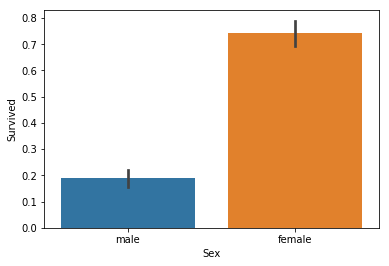

In [4]:
# Analysis on gender basis
# Bar plot
sns.barplot(x="Sex", y="Survived", data=train)
# percentage calculation
male_survivied_percentage=train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100
female_survivied_percentage=train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100
print("percentage male survived : ",male_survivied_percentage)
print("percentage female survived : ",female_survivied_percentage)

It seems females have survival chance almost four times than the males 

percentage 1st class survived :  62.96296296296296
percentage 2nd class survived :  47.28260869565217
percentage 3rd class survived :  24.236252545824847


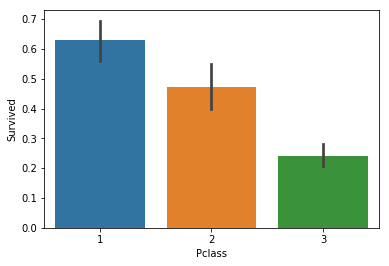

In [5]:
#similar bar plot for Pclass
sns.barplot(x="Pclass", y="Survived", data=train)
print("percentage 1st class survived : ",train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("percentage 2nd class survived : ",train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("percentage 3rd class survived : ",train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)


###### Pclass 1 people have higher chance to survive than that of Pclass 2 and least survival chance for the  Pclass 3.

###### Pclass 1 and 2 are having around or more than 50% chance of survival whereas Pclass 3 has less that 25% survival. 


percentage having less than 2 siblings/spouse survived :  39.64497041420118
percentage have more than 2 siblings/spouse survived :  15.217391304347828


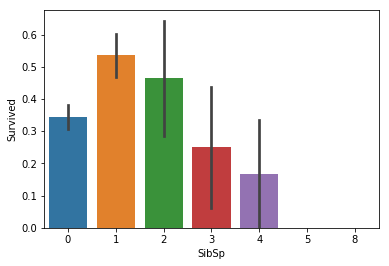

In [6]:
#similar bar plot for SibSp
sns.barplot(x="SibSp", y="Survived", data=train)
print("percentage having less than 2 siblings/spouse survived : ",train["Survived"][train["SibSp"] <= 2].value_counts(normalize = True)[1]*100)
print("percentage have more than 2 siblings/spouse survived : ",train["Survived"][train["SibSp"] >2].value_counts(normalize = True)[1]*100)
#similar barplots can be shown for other features too

###### It is clear that people having one or two sibling/spouse have higher chance to survive than a single and obviously higher number of sibling/spouse have lesser chances of survival.

###### People having less than 2 siblings/spouse have almost 25% higher chance of survival than more than 2 siblings/spouse.

percentage kids survived :  59.036144578313255


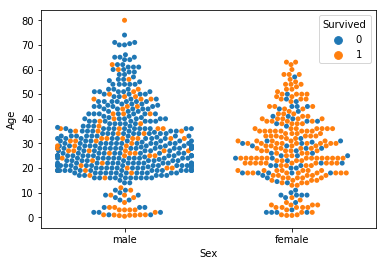

In [7]:
#interfacing plots for 
sns.swarmplot(x="Sex",y="Age",hue='Survived',data=train)
print("percentage kids survived : ",train["Survived"][train["Age"]<=15].value_counts(normalize = True)[1]*100)
#we will discuss about the number later in this notebook

###### As we saw earlier that male are expected to survive less than female among them male kids(age 0-10 yrs) have higher chance of survival.

###### Also we can observe that males upto age above 80yrs travelled but where as females travelled at max around 65yrs age only.

###### Also more number of travellers are from age group 18 to 40 yrs.

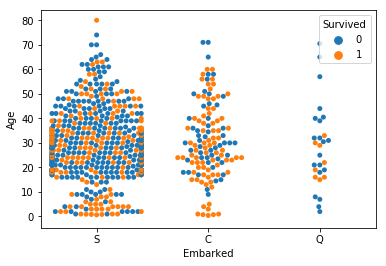

In [8]:
#these type of plotes are better for continuos data like age and fare etc
sns.swarmplot(x="Embarked",y="Age",hue='Survived',data=train)


###### It seems most people embarked at S and very less number of people at Q.

###### people embarked at C have higher chance to survive than other people.

###### Also no kids and old people survived who embarked at Q.

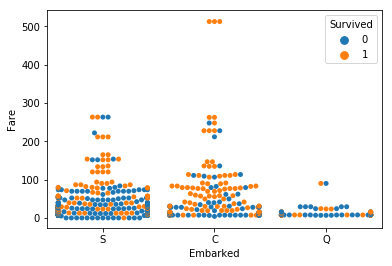

In [9]:
sns.swarmplot(x="Embarked",y="Fare",hue='Survived',data=train)


###### As expected people who has less fare has less chances of survival and the highest fare is for who embarked at C(all are alive).

###### Also it seems fare for who embarked at Q is less than other two maybe the distance is less between Q and the destination.

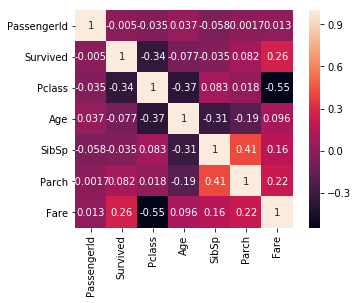

In [10]:
hmap = sns.heatmap(train.corr(), square=True, annot=True)


###### We are getting less correlation values for passenger Id so we can drop it as a feature from train data.
    
###### Also there aren't any highly correlated(>0.9) values between any other features so we can say no two features represent same(no redundancy)

Text(0.5,1,'plot showing only male data')

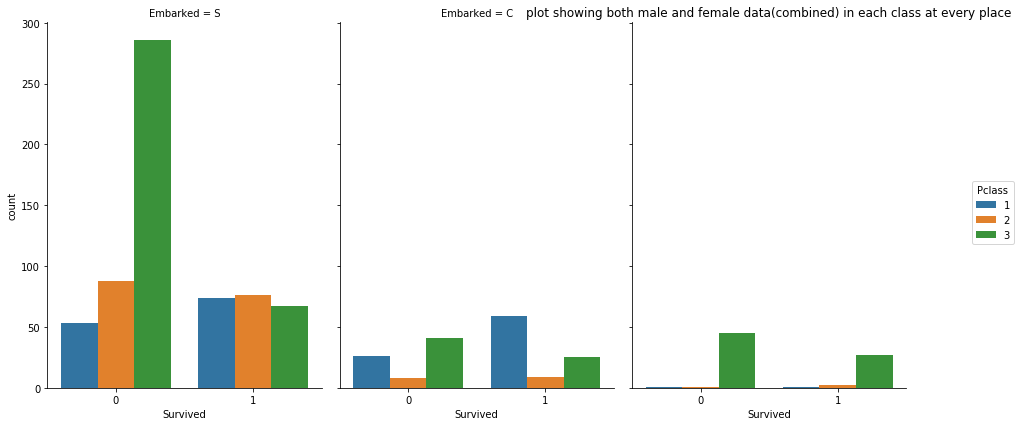

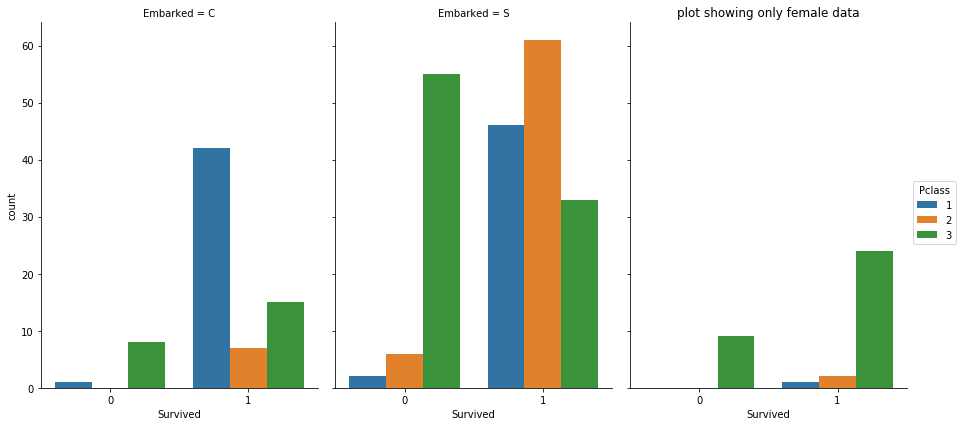

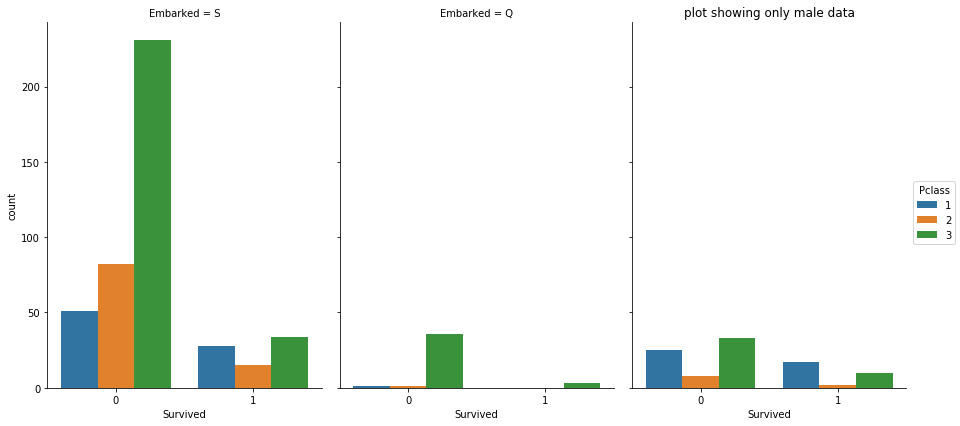

In [11]:
#factor plot gives us some insights on numbers(I mean count at each type)
#both male and female data plotted together
sns.factorplot(x="Survived", hue = "Pclass" , col="Embarked", data=train , kind="count",size=6, aspect=.7)
plt.title('plot showing both male and female data(combined) in each class at every place')
#only female data plotted
femaledata=train[ train['Sex'] == 'female' ]
sns.factorplot(x="Survived", hue = "Pclass" , col="Embarked", data=femaledata , kind="count",size=6, aspect=.7)
plt.title('plot showing only female data')
#only male data plotted together
maledata=train[ train['Sex'] == 'male' ]
sns.factorplot(x="Survived", hue = "Pclass" , col="Embarked", data=maledata , kind="count",size=6, aspect=.7)
plt.title('plot showing only male data')

###### We can say almost very less male Embarked at Q except in the Pclass 3 and most of them in there didn't survived too.

###### Every female who Embarked at C int Pclass 2 survived.


In [12]:
#from above plots we can get a rough idea but we can get exact numbers using crosstab
print(pd.crosstab([train.Sex,train.Survived],train.Pclass))
#We can include more colums into the crosstab but it becomes tidious to comare if we want we can dig more with the help of seperated male and female data earlier.


Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47


#### Highest chance of survival is for female in Pclass 1 with 96.8% and least survival chance is for male in pclass 3 that is 13.5%

In [13]:
print(pd.crosstab([train.Sex,train.Survived],train.Embarked))


Embarked          C   Q    S
Sex    Survived             
female 0          9   9   63
       1         64  27  140
male   0         66  38  364
       1         29   3   77


##### Highest chance of survival is for female who embarked at C with 87.6% and least for male who embarked at Q with 7.3%

### It is better to Embark at C in Pclass 1 for both male and female, with one sibling/spouse and taking a high fare ticket has better chances of survival 